<a href="https://colab.research.google.com/github/Deeksha-Pandit/EVA4-S12/blob/master/Assignment%20B/Annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import json
import pandas as pd 

<h3>Open JSON file and read contents</h3>

In [3]:
file = open('/content/gdrive/My Drive/Session12/via_export_coco (4).json')
data = json.load(file)
print(data.keys())

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])


In [4]:
data['info']

{'contributor': '',
 'date_created': 'Fri Apr 17 2020 15:55:33 GMT+0530 (India Standard Time)',
 'description': 'Exported using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)',
 'url': 'http://www.robots.ox.ac.uk/~vgg/software/via/',
 'version': '1',
 'year': 2020}

<h3>Split into images and annotation dataframe</h3>

In [0]:
images = pd.DataFrame(data['images'], columns = data['images'][0].keys())
annotations = pd.DataFrame(data['annotations'], columns = data['annotations'][0].keys())

In [6]:
print(images.head(),'\n')
print('###################################################')
print(annotations.head())

   id  width  height file_name  license date_captured
0   0    900     600     1.jpg        1              
1   1   1200     600     2.jpg        1              
2   2   1254     836     3.jpg        1              
3   3    540     405     4.jpg        1              
4   4   1024    1024     5.jpg        1               

###################################################
   id image_id  ...                 bbox  iscrowd
0   0        0  ...  [225, 64, 550, 386]        0
1   1        1  ...  [376, 40, 366, 553]        0
2   2        2  ...    [8, 11, 773, 821]        0
3   3        3  ...    [7, 71, 486, 334]        0
4   4        4  ...    [6, 21, 768, 715]        0

[5 rows x 6 columns]


In [0]:
file.close()

<h3>Extracting only the width and height of bounding box by splitting the bbox Series</h3>

In [8]:
#extracting only the width and height of bounding box by splitting the bbox Series
b_width = []
b_height = []

#print(len(files_split["bbox"]))

for i in range(len(annotations["bbox"])):
  a=annotations["bbox"][i]
  if type(a) != type([]): continue
  b_width.append(a[2])
  b_height.append(a[3])
print("bbox width=",b_width,"\nbbox height=",b_height)

bbox width= [550, 366, 773, 486, 768, 534, 282, 475, 412, 436, 1129, 250, 227, 442, 314, 565, 662, 199, 213, 989, 250, 403, 418, 336, 356, 584, 199, 186, 383, 528, 372, 332, 306, 912, 242, 634, 340, 1325, 174, 453, 703, 442, 169, 423, 431, 425, 706, 239, 306, 169] 
bbox height= [386, 553, 821, 334, 715, 411, 320, 508, 329, 593, 804, 344, 308, 331, 296, 664, 450, 287, 292, 663, 386, 495, 603, 210, 203, 862, 470, 163, 562, 253, 447, 609, 333, 400, 365, 437, 188, 497, 273, 853, 560, 426, 106, 390, 461, 849, 482, 273, 470, 320]


<h3>Making a single DataFrame from required info</h3>

In [9]:
#concatinating both images and annotations and dropping the columns that are not required
annotations['b_width']=b_width
annotations['b_height']=b_height

annotations = pd.concat([images,annotations],axis=1)
annotations = annotations.drop(["id","image_id","license","iscrowd","area","segmentation","date_captured","bbox"],axis=1)
annotations.head()

,width,height,file_name,b_width,b_height
0,900,600,1.jpg,550,386
1,1200,600,2.jpg,366,553
2,1254,836,3.jpg,773,821
3,540,405,4.jpg,486,334
4,1024,1024,5.jpg,768,715


<h3>Normalize the bounding box width and height</h3>

In [0]:
#normalize the bbox width and bbox height 
annotations['b_width'] = annotations['b_width'].div(annotations['width'])
annotations['b_height'] = annotations['b_height'].div(annotations['height'])

<h3>Normalizing the image width and height</h3>

In [11]:
#normalize the width and height of image to 1x1
annotations['width'] = annotations['width'].div(annotations['width'])
annotations['height'] = annotations['height'].div(annotations['height'])
annotations.head()

,width,height,file_name,b_width,b_height
0,1.0,1.0,1.jpg,0.611111,0.643333
1,1.0,1.0,2.jpg,0.305000,0.921667
2,1.0,1.0,3.jpg,0.616427,0.982057
3,1.0,1.0,4.jpg,0.900000,0.824691
4,1.0,1.0,5.jpg,0.750000,0.698242


In [0]:
#extract only the colums we want to work on
annotations=annotations.drop(["width","height","file_name"],axis=1)

<h3>KMeans algorithm</h3>

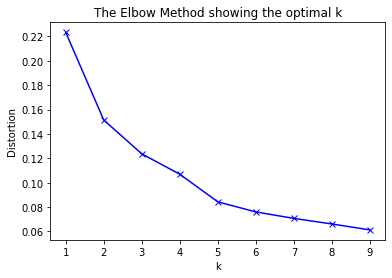

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(annotations)
    kmeanModel.fit(annotations)
    distortions.append(sum(np.min(cdist(annotations, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / annotations.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
arr = np.array(annotations)

In [15]:
kmeans = KMeans(3)
kmeans.fit(arr)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<h3>Scatter plot for finding centroid and plotting</h3>

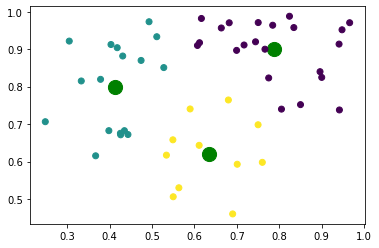

In [16]:
#plotting the scatter plot and finding centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='green',s=200)
plt.scatter(list(annotations['b_width']),list(annotations['b_height']),c=list(kmeans.labels_.astype(float)))